# Surprise Housing : Regression for Housing Data of Australian Market

## Assignment Part I

#### The dataset is about the sale of houses in Australia

#### The Surprise Housing company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
##### Goal : Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. Also determine the optimal value of lambda for ridge and lasso regression

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

We will follow the below steps for solving this problem:
1. Load the data and understand the variables
2. Data Inspection
3. EDA
4. Missing Value Imputation
5. Train-Test Split
6. Scaling
7. Modelling
8. Tuning with Regularizatin (Ridge and Lasso)
9. Model Evaluation

### Load the data and understand the variables

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as matplt
import seaborn as sbn

In [3]:
# Load the data set
housing_df = pd.read_csv("train.csv")

In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Inspection

In [5]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# dropping the Id column since it is an identifier
del housing_df['Id']

In [8]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA

### Missing Values Imputation

##### Check missing and apply imputation as needed

In [9]:
# Checking the NA columns in the dataset
housing_na_columns = housing_df.columns[housing_df.isna().any()].tolist()
housing_na_columns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
housing_df[housing_na_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [11]:
housing_df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

### PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool


In [12]:
## PoolQC - nan can be imputed with value NP - No Pool (we are not using NA to avoid python thinking it as nan)
housing_df["PoolQC"].fillna("NP", inplace = True)


In [13]:
housing_df['PoolQC'].unique()

array(['NP', 'Ex', 'Fa', 'Gd'], dtype=object)

In [14]:
#Lets look at the count
housing_df[['PoolQC', 'PoolArea']].groupby(by='PoolQC').count()
## We are keeping PoolQC

,PoolArea
PoolQC,
Ex,2
Fa,2
Gd,3
NP,1453


In [15]:
# Checking the NA columns in the dataset again.
housing_na_columns = housing_df.columns[housing_df.isna().any()].tolist()
housing_na_columns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence',
 'MiscFeature']

In [16]:
housing_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [17]:
housing_df[['MiscFeature', 'PoolArea']].groupby(by='MiscFeature').count()

,PoolArea
MiscFeature,
Gar2,2
Othr,2
Shed,49
TenC,1


MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [18]:
## We will use NoMisc for NA for this feature
housing_df["MiscFeature"].fillna("NoMisc", inplace = True)

In [19]:
# Checking the NA columns in the dataset again.
housing_na_columns = housing_df.columns[housing_df.isna().any()].tolist()
housing_na_columns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']

#### Missing values for most of these columns does not mean they are missing. As the data dictionary, it means that feature is not applicable for the house. Since missing a feature in the housing property could impact the price, we will keep these columns and impute values as per the data dictionary

In [20]:
housing_df[housing_na_columns].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,Fence
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN


In [21]:
housing_df[housing_na_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  Fence         281 non-null    object 
dtypes: float64(3), object(14)
memory usage: 194.0+ KB


In [22]:
housing_df["LotFrontage"].fillna(0, inplace = True)

In [23]:
housing_df["LotFrontage"].describe()

count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [24]:
housing_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [25]:
housing_df[['FireplaceQu', 'PoolArea']].groupby(by='FireplaceQu').count()

,PoolArea
FireplaceQu,
Ex,24
Fa,33
Gd,380
Po,20
TA,313


In [26]:
# Fire Place Quality - FireplaceQu .. we will fill na with NF (No Fireplace)
housing_df["FireplaceQu"].fillna("NF", inplace=True)

In [27]:
housing_df[['FireplaceQu', 'PoolArea']].groupby(by='FireplaceQu').count()

,PoolArea
FireplaceQu,
Ex,24
Fa,33
Gd,380
NF,690
Po,20
TA,313


In [28]:
# Checking the NA columns in the dataset again.
housing_na_columns = housing_df.columns[housing_df.isna().any()].tolist()
housing_na_columns

['Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']

In [29]:
for column in housing_na_columns:
    print("Feature Unique Values:", column)
    print(housing_df[column].unique())

Feature Unique Values: Alley
[nan 'Grvl' 'Pave']
Feature Unique Values: MasVnrType
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
Feature Unique Values: MasVnrArea
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1

In [30]:
# Fire Place Quality - FireplaceQu .. we will fill na with NF (No Fireplace)
housing_df["Alley"].fillna("NoAccess", inplace=True)

In [31]:
housing_df[['MasVnrType', 'PoolArea']].groupby(by='MasVnrType').count()

,PoolArea
MasVnrType,
BrkCmn,15
BrkFace,445
None,864
Stone,128


In [32]:
housing_df["MasVnrType"].fillna("NotSpecified", inplace=True)

In [33]:
housing_df[['MasVnrType', 'PoolArea']].groupby(by='MasVnrType').count()

,PoolArea
MasVnrType,
BrkCmn,15
BrkFace,445
None,864
NotSpecified,8
Stone,128


In [34]:
housing_df["BsmtQual"].fillna("NoBasement", inplace=True)

In [35]:
#BsmtCond
housing_df[['BsmtCond', 'PoolArea']].groupby(by='BsmtCond').count()

,PoolArea
BsmtCond,
Fa,45
Gd,65
Po,2
TA,1311


In [36]:
housing_df["BsmtCond"].fillna("NoBasement", inplace=True)

In [37]:
#BsmtExposure
housing_df[['BsmtExposure', 'PoolArea']].groupby(by='BsmtExposure').count()

,PoolArea
BsmtExposure,
Av,221
Gd,134
Mn,114
No,953


In [38]:
housing_df["BsmtExposure"].fillna("NoBasement", inplace=True)

In [39]:
# BsmtFinType1
housing_df[['BsmtFinType1', 'PoolArea']].groupby(by='BsmtFinType1').count()

,PoolArea
BsmtFinType1,
ALQ,220
BLQ,148
GLQ,418
LwQ,74
Rec,133
Unf,430


In [40]:
housing_df["BsmtFinType1"].fillna("NoBasement", inplace=True)

In [41]:
#BsmtFinType2
housing_df[['BsmtFinType2', 'PoolArea']].groupby(by='BsmtFinType2').count()

,PoolArea
BsmtFinType2,
ALQ,19
BLQ,33
GLQ,14
LwQ,46
Rec,54
Unf,1256


In [42]:
housing_df["BsmtFinType2"].fillna("NoBasement", inplace=True)

In [43]:
# Electrical
housing_df[['Electrical', 'PoolArea']].groupby(by='Electrical').count()

,PoolArea
Electrical,
FuseA,94
FuseF,27
FuseP,3
Mix,1
SBrkr,1334


In [44]:
housing_df[["Electrical"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Electrical  1459 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [45]:
# GarageType
housing_df[['GarageType', 'PoolArea']].groupby(by='GarageType').count()

,PoolArea
GarageType,
2Types,6
Attchd,870
Basment,19
BuiltIn,88
CarPort,9
Detchd,387


In [46]:
housing_df[["GarageType"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   GarageType  1379 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [47]:
housing_df["GarageType"].fillna("NoGarage", inplace=True)

In [48]:
housing_df["GarageType"].isna().sum()

0

In [49]:
# GarageFinish
housing_df[['GarageFinish', 'PoolArea']].groupby(by='GarageFinish').count()

,PoolArea
GarageFinish,
Fin,352
RFn,422
Unf,605


In [50]:
housing_df["GarageFinish"].isna().sum()

81

In [51]:
housing_df["GarageFinish"].fillna("NoGarage", inplace=True)

In [52]:
#GarageQual
print(housing_df[['GarageQual', 'PoolArea']].groupby(by='GarageQual').count())
print(housing_df["GarageQual"].isna().sum())

            PoolArea
GarageQual          
Ex                 3
Fa                48
Gd                14
Po                 3
TA              1311
81


In [53]:
housing_df["GarageQual"].fillna("NoGarage", inplace=True)

In [54]:
# GarageCond
print(housing_df[['GarageCond', 'PoolArea']].groupby(by='GarageCond').count())
print(housing_df["GarageCond"].isna().sum())

            PoolArea
GarageCond          
Ex                 2
Fa                35
Gd                 9
Po                 7
TA              1326
81


In [55]:
housing_df["GarageCond"].fillna("NoGarage", inplace=True)

In [56]:
# Fence
print(housing_df[['Fence', 'PoolArea']].groupby(by='Fence').count())
print(housing_df["Fence"].isna().sum())

       PoolArea
Fence          
GdPrv        59
GdWo         54
MnPrv       157
MnWw         11
1179


In [57]:
housing_df["Fence"].fillna("NoFence", inplace=True)

In [58]:
housing_df.columns[housing_df.isna().any()].tolist()

['MasVnrArea', 'Electrical', 'GarageYrBlt']

In [59]:
# GarageYrBlt is a categorical variable. We will impute the mode for the missing values.
# We will update this as string
year = housing_df.GarageYrBlt.mode()[0]
print(housing_df.GarageYrBlt.mode()[0])
housing_df['GarageYrBlt'].fillna(year, inplace=True)

2005.0


In [60]:
housing_df[['MasVnrArea', 'GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MasVnrArea   1452 non-null   float64
 1   GarageYrBlt  1460 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [61]:
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype(int)

In [62]:
print(housing_df[['GarageYrBlt', 'PoolArea']].groupby(by='GarageYrBlt').count())

             PoolArea
GarageYrBlt          
1900                1
1906                1
1908                1
1910                3
1914                2
...               ...
2006               59
2007               49
2008               29
2009               21
2010                3

[97 rows x 1 columns]


In [63]:
## Lets treat Year as categorical
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype(str)

In [64]:
housing_df['MasVnrArea'].isna().sum()

8

In [65]:
print(housing_df['MasVnrArea'].mean())
print(housing_df.MasVnrArea.median())

103.68526170798899
0.0


In [66]:
## MasVnrArea: Masonry veneer area in square feet
## We will impute median value for MasVnrArea
housing_df['MasVnrArea'].fillna(0.0, inplace=True)

In [67]:
housing_df[['MasVnrArea', 'GarageYrBlt']].describe()

,MasVnrArea
count,1460.000000
mean,103.117123
std,180.731373
min,0.000000
25%,0.000000
50%,0.000000
75%,164.250000
max,1600.000000


Now that we have handled most of the missing values, lets proceed with EDA

### EDA continued

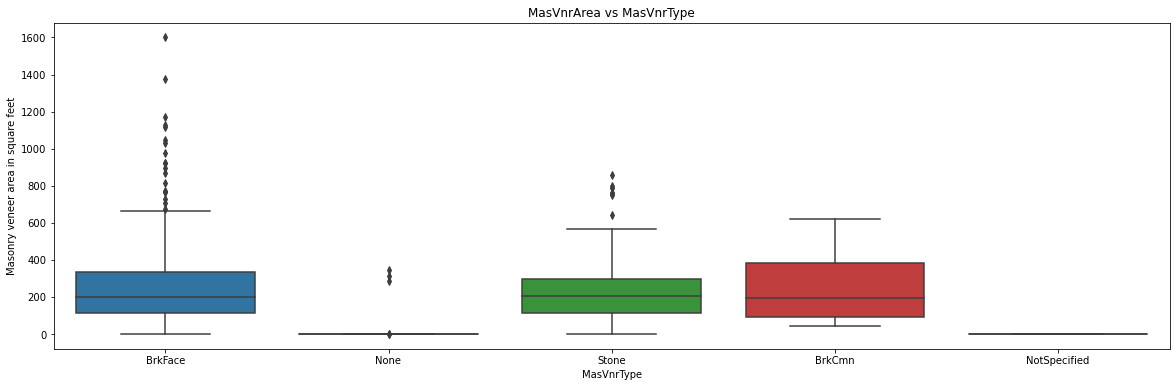

In [68]:
matplt.figure(figsize=(20,6))
ax=sbn.boxplot(x='MasVnrType',y='MasVnrArea',data=housing_df)
ax.set(xlabel='MasVnrType', ylabel='Masonry veneer area in square feet',title='MasVnrArea vs MasVnrType')
matplt.show()

In [69]:
# MasVnrArea is skewed towards 0

In [70]:
## Lets check the remaining attributes

In [71]:
print(housing_df[['MSSubClass', 'PoolArea']].groupby(by='MSSubClass').count())

            PoolArea
MSSubClass          
20               536
30                69
40                 4
45                12
50               144
60               299
70                60
75                16
80                58
85                20
90                52
120               87
160               63
180               10
190               30


In [72]:
# MSSubClass is categorical. Lets update
housing_df['MSSubClass'] = housing_df['MSSubClass'].astype('category')

In [73]:
housing_df[['OverallQual', 'PoolArea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   PoolArea     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [74]:
print(housing_df[['OverallQual', 'PoolArea']].groupby(by='OverallQual').count())

             PoolArea
OverallQual          
1                   2
2                   3
3                  20
4                 116
5                 397
6                 374
7                 319
8                 168
9                  43
10                 18


In [75]:
# OverallQual is categorical. Lets update
housing_df['OverallQual'] = housing_df['OverallQual'].astype('category')

In [76]:
housing_df[['OverallQual', 'PoolArea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OverallQual  1460 non-null   category
 1   PoolArea     1460 non-null   int64   
dtypes: category(1), int64(1)
memory usage: 13.3 KB


In [77]:
housing_df[['OverallQual', 'PoolArea']].describe()

,PoolArea
count,1460.000000
mean,2.758904
std,40.177307
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,738.000000


In [78]:
housing_df[['OverallCond', 'PoolArea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallCond  1460 non-null   int64
 1   PoolArea     1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [79]:
print(housing_df[['OverallCond', 'PoolArea']].groupby(by='OverallCond').count())

             PoolArea
OverallCond          
1                   1
2                   5
3                  25
4                  57
5                 821
6                 252
7                 205
8                  72
9                  22


In [80]:
# OverallCond is categorical. Lets update
housing_df['OverallCond'] = housing_df['OverallCond'].astype('category')

In [81]:

# YearBuilt is categorical. Lets update
housing_df['YearBuilt'] = housing_df['YearBuilt'].astype('category')

In [82]:
# YearRemodAdd is categorical. Lets update
housing_df['YearRemodAdd'] = housing_df['YearRemodAdd'].astype('category')

In [83]:
# MoSold is categorical. Lets update
housing_df['MoSold'] = housing_df['MoSold'].astype('category')

In [84]:
# YrSold is categorical. Lets update
housing_df['YrSold'] = housing_df['YrSold'].astype('category')

In [85]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          1460 non-null   object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

In [86]:
for column in housing_df.columns:
    print(column, housing_df.loc[0][column])

MSSubClass 60
MSZoning RL
LotFrontage 65.0
LotArea 8450
Street Pave
Alley NoAccess
LotShape Reg
LandContour Lvl
Utilities AllPub
LotConfig Inside
LandSlope Gtl
Neighborhood CollgCr
Condition1 Norm
Condition2 Norm
BldgType 1Fam
HouseStyle 2Story
OverallQual 7
OverallCond 5
YearBuilt 2003
YearRemodAdd 2003
RoofStyle Gable
RoofMatl CompShg
Exterior1st VinylSd
Exterior2nd VinylSd
MasVnrType BrkFace
MasVnrArea 196.0
ExterQual Gd
ExterCond TA
Foundation PConc
BsmtQual Gd
BsmtCond TA
BsmtExposure No
BsmtFinType1 GLQ
BsmtFinSF1 706
BsmtFinType2 Unf
BsmtFinSF2 0
BsmtUnfSF 150
TotalBsmtSF 856
Heating GasA
HeatingQC Ex
CentralAir Y
Electrical SBrkr
1stFlrSF 856
2ndFlrSF 854
LowQualFinSF 0
GrLivArea 1710
BsmtFullBath 1
BsmtHalfBath 0
FullBath 2
HalfBath 1
BedroomAbvGr 3
KitchenAbvGr 1
KitchenQual Gd
TotRmsAbvGrd 8
Functional Typ
Fireplaces 0
FireplaceQu NF
GarageType Attchd
GarageYrBlt 2003
GarageFinish RFn
GarageCars 2
GarageArea 548
GarageQual TA
GarageCond TA
PavedDrive Y
WoodDeckSF 0
OpenPorch

In [87]:
print(housing_df[['GarageCars', 'PoolArea']].info())
print(housing_df[['GarageCars', 'PoolArea']].groupby(by='GarageCars').count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   GarageCars  1460 non-null   int64
 1   PoolArea    1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
None
            PoolArea
GarageCars          
0                 81
1                369
2                824
3                181
4                  5


In [88]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          1460 non-null   object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

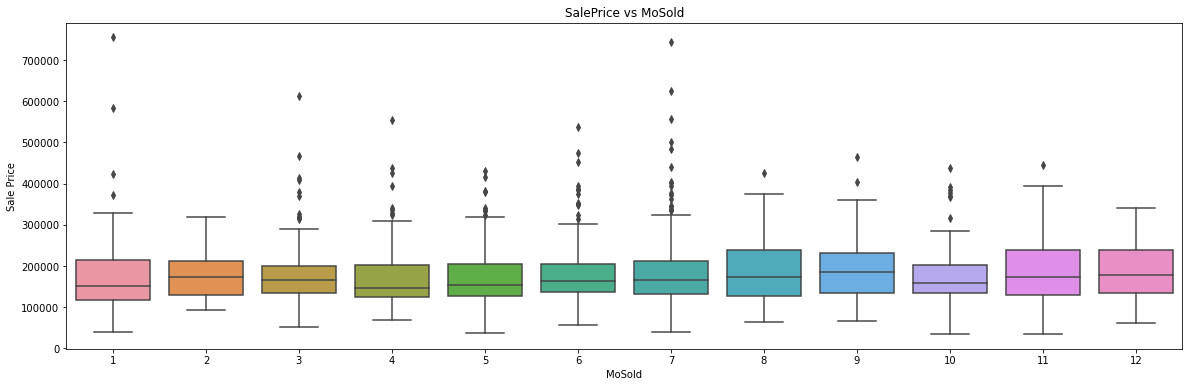

In [89]:
matplt.figure(figsize=(20,6))
ax=sbn.boxplot(x='MoSold',y='SalePrice',data=housing_df)
ax.set(xlabel='MoSold', ylabel='Sale Price',title='SalePrice vs MoSold')
matplt.show()

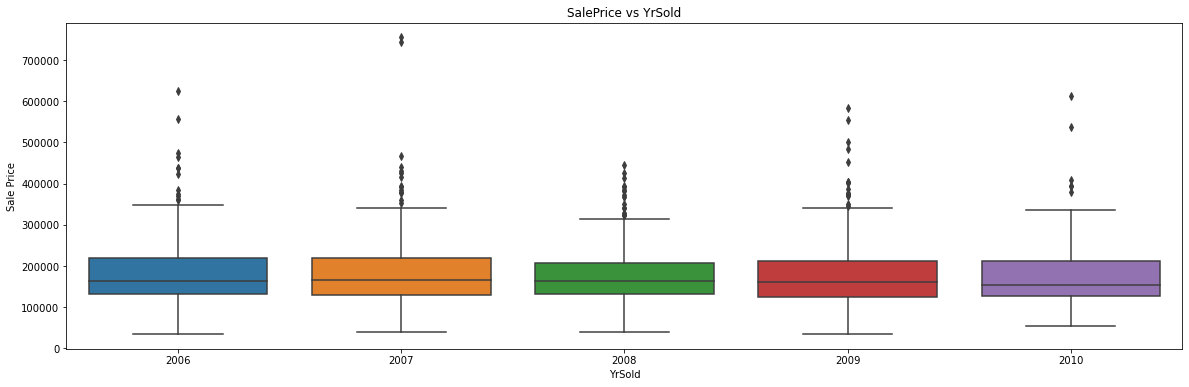

In [90]:
matplt.figure(figsize=(20,6))
ax=sbn.boxplot(x='YrSold',y='SalePrice',data=housing_df)
ax.set(xlabel='YrSold', ylabel='Sale Price',title='SalePrice vs YrSold')
matplt.show()

In [91]:
housing_df[['SalePrice']].describe(percentiles=(.25,.5,.75,.95,.99,.9981,.9985,.9988, .999, .9991, .9995, .9998))

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
95%,326100.000000
99%,442567.010000
99.81%,614697.869700


In [92]:
## Looks like there are some outliers in the data for SalePrice
housing_df[housing_df.SalePrice > housing_df.SalePrice.quantile(.995)].iloc[:, :12]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood
440,20,RL,105.0,15431,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,NridgHt
691,60,RL,104.0,21535,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NoRidge
769,60,RL,47.0,53504,Pave,NoAccess,IR2,HLS,AllPub,CulDSac,Mod,StoneBr
803,60,RL,107.0,13891,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,NridgHt
898,20,RL,100.0,12919,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,NridgHt
1046,60,RL,85.0,16056,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,StoneBr
1169,60,RL,118.0,35760,Pave,NoAccess,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge
1182,60,RL,160.0,15623,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,NoRidge


In [93]:
housing_df[housing_df.SalePrice > housing_df.SalePrice.quantile(.995)].iloc[:, 60:]

,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,3,672,TA,TA,Y,0,72,0,0,170,0,NP,NoFence,NoMisc,0,4,2009,WD,Normal,555000
691,3,832,TA,TA,Y,382,50,0,0,0,0,NP,NoFence,NoMisc,0,1,2007,WD,Normal,755000
769,3,841,TA,TA,Y,503,36,0,0,210,0,NP,NoFence,NoMisc,0,6,2010,WD,Normal,538000
803,3,1020,TA,TA,Y,52,170,0,0,192,0,NP,NoFence,NoMisc,0,1,2009,New,Partial,582933
898,3,820,TA,TA,Y,0,67,0,0,0,0,NP,NoFence,NoMisc,0,3,2010,New,Partial,611657
1046,3,716,TA,TA,Y,214,108,0,0,0,0,NP,NoFence,NoMisc,0,7,2006,New,Partial,556581
1169,3,807,TA,TA,Y,361,76,0,0,0,0,NP,NoFence,NoMisc,0,7,2006,WD,Normal,625000
1182,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NoMisc,0,7,2007,WD,Abnorml,745000


In [94]:
# Remove data above 99.5th percentile
housing_df = housing_df[housing_df.SalePrice <= housing_df.SalePrice.quantile(.995)]

In [95]:
housing_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1452 non-null   category
 1   MSZoning       1452 non-null   object  
 2   LotFrontage    1452 non-null   float64 
 3   LotArea        1452 non-null   int64   
 4   Street         1452 non-null   object  
 5   Alley          1452 non-null   object  
 6   LotShape       1452 non-null   object  
 7   LandContour    1452 non-null   object  
 8   Utilities      1452 non-null   object  
 9   LotConfig      1452 non-null   object  
 10  LandSlope      1452 non-null   object  
 11  Neighborhood   1452 non-null   object  
 12  Condition1     1452 non-null   object  
 13  Condition2     1452 non-null   object  
 14  BldgType       1452 non-null   object  
 15  HouseStyle     1452 non-null   object  
 16  OverallQual    1452 non-null   category
 17  OverallCond    1452 non-null   ca

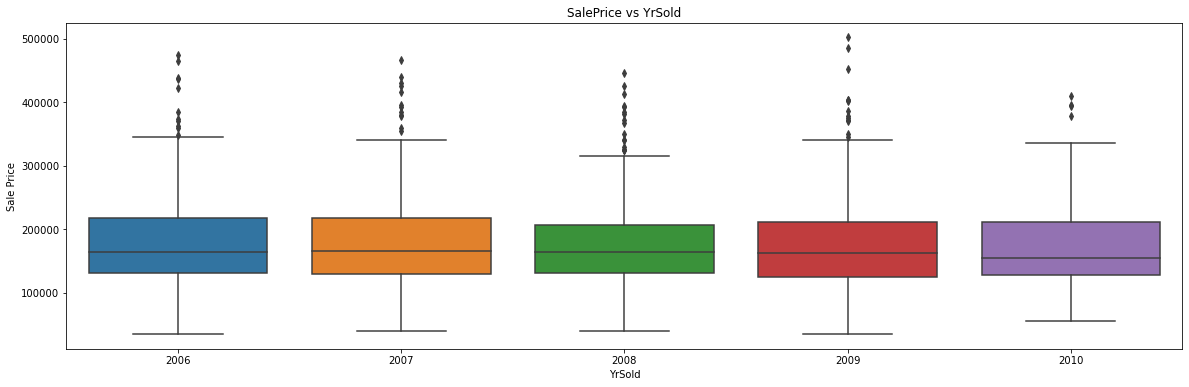

In [96]:
matplt.figure(figsize=(20,6))
ax=sbn.boxplot(x='YrSold',y='SalePrice',data=housing_df)
ax.set(xlabel='YrSold', ylabel='Sale Price',title='SalePrice vs YrSold')
matplt.show()

In [97]:
# Remove data above 99th percentile
housing_df = housing_df[housing_df.SalePrice <= housing_df.SalePrice.quantile(.99)]

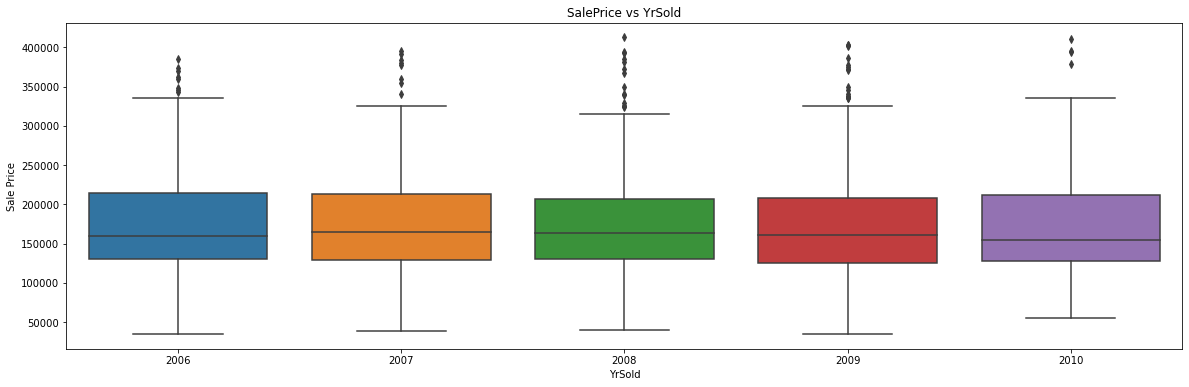

In [98]:
matplt.figure(figsize=(20,6))
ax=sbn.boxplot(x='YrSold',y='SalePrice',data=housing_df)
ax.set(xlabel='YrSold', ylabel='Sale Price',title='SalePrice vs YrSold')
matplt.show()

In [99]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1437 non-null   category
 1   MSZoning       1437 non-null   object  
 2   LotFrontage    1437 non-null   float64 
 3   LotArea        1437 non-null   int64   
 4   Street         1437 non-null   object  
 5   Alley          1437 non-null   object  
 6   LotShape       1437 non-null   object  
 7   LandContour    1437 non-null   object  
 8   Utilities      1437 non-null   object  
 9   LotConfig      1437 non-null   object  
 10  LandSlope      1437 non-null   object  
 11  Neighborhood   1437 non-null   object  
 12  Condition1     1437 non-null   object  
 13  Condition2     1437 non-null   object  
 14  BldgType       1437 non-null   object  
 15  HouseStyle     1437 non-null   object  
 16  OverallQual    1437 non-null   category
 17  OverallCond    1437 non-null   ca

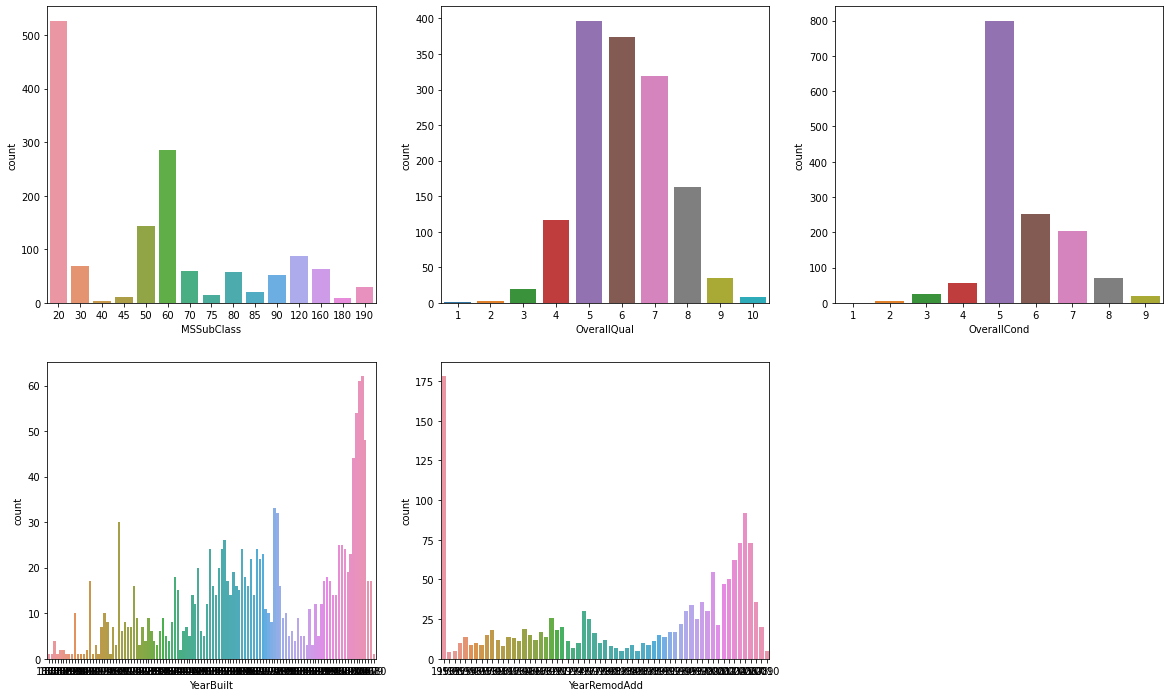

In [100]:
# MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MoSold, YrSold 
matplt.figure(figsize=(20, 12))
matplt.subplot(2,3,1)
sbn.countplot(x = 'MSSubClass', data = housing_df)

matplt.subplot(2,3,2)
sbn.countplot(x = 'OverallQual',  data = housing_df)

matplt.subplot(2,3,3)
sbn.countplot(x = 'OverallCond', data = housing_df)
matplt.subplot(2,3,4)
sbn.countplot(x = 'YearBuilt', data = housing_df)
matplt.subplot(2,3,5)
sbn.countplot(x = 'YearRemodAdd',  data = housing_df)

matplt.show()

In [101]:
# Lets treat year values as continous variables
# YearBuilt, YearRemodAdd, GarageYrBlt, YrSold

housing_df['YearBuilt'] = housing_df['YearBuilt'].astype(int)
housing_df['YearRemodAdd'] = housing_df['YearRemodAdd'].astype(int)
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype(int)
housing_df['YrSold'] = housing_df['YrSold'].astype(int)

In [102]:
# Lets identify all the numeric values in the df
# all numeric (float and int) variables in the dataset
housing_numeric_df = housing_df.select_dtypes(include=['float64', 'int64'])
housing_numeric_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,836,192,84,0,0,0,0,0,2008,250000


In [103]:
housing_categorical_df = housing_df.select_dtypes(include=['object', 'category'])
housing_categorical_df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,Pave,NoAccess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,NP,NoFence,NoMisc,2,WD,Normal
1,20,RL,Pave,NoAccess,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,NP,NoFence,NoMisc,5,WD,Normal
2,60,RL,Pave,NoAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,NP,NoFence,NoMisc,9,WD,Normal
3,70,RL,Pave,NoAccess,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,NP,NoFence,NoMisc,2,WD,Abnorml
4,60,RL,Pave,NoAccess,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,NP,NoFence,NoMisc,12,WD,Normal


In [104]:
housing_categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1437 non-null   category
 1   MSZoning       1437 non-null   object  
 2   Street         1437 non-null   object  
 3   Alley          1437 non-null   object  
 4   LotShape       1437 non-null   object  
 5   LandContour    1437 non-null   object  
 6   Utilities      1437 non-null   object  
 7   LotConfig      1437 non-null   object  
 8   LandSlope      1437 non-null   object  
 9   Neighborhood   1437 non-null   object  
 10  Condition1     1437 non-null   object  
 11  Condition2     1437 non-null   object  
 12  BldgType       1437 non-null   object  
 13  HouseStyle     1437 non-null   object  
 14  OverallQual    1437 non-null   category
 15  OverallCond    1437 non-null   category
 16  RoofStyle      1437 non-null   object  
 17  RoofMatl       1437 non-null   ob

In [105]:
# Create Dummies
# convert into dummies - one hot encoding
column_dummies = pd.get_dummies(housing_categorical_df, drop_first=True)
column_dummies.head()

# drop categorical variables 
housing_df = housing_df.drop(list(housing_categorical_df.columns), axis=1)

# concat dummy variables with X
housing_df = pd.concat([housing_df, column_dummies], axis=1)

In [106]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1459
Columns: 299 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(31), uint8(266)
memory usage: 787.3 KB


In [107]:
housing_df.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=299)

In [108]:
housing_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


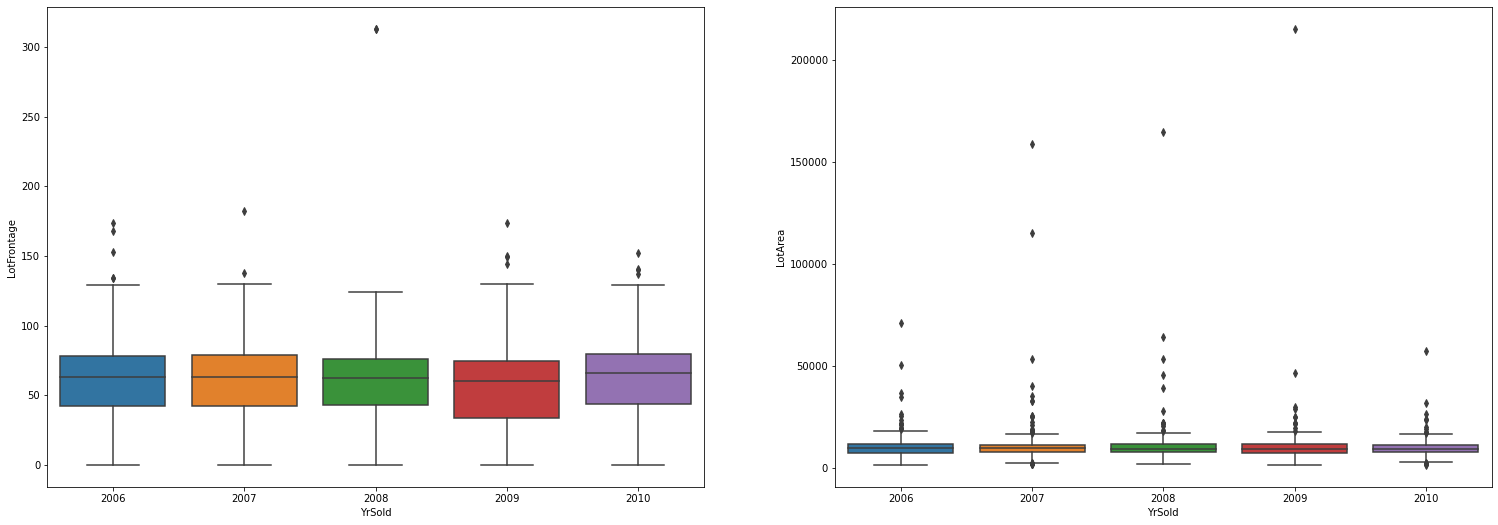

In [109]:
## Lets use subplots to check outliers again
matplt.figure(figsize=(40,30))
matplt.subplot(3,3,1)
sbn.boxplot(x='YrSold', y='LotFrontage', data=housing_df)
matplt.subplot(3,3,2)
sbn.boxplot(x='YrSold', y='LotArea', data=housing_df)
matplt.show()

In [110]:
housing_df[['LotFrontage']].describe(percentiles=(.25,.5,.75,.95,.99,.995,.998,.9988, .999, .9991, .9995, .9998))

,LotFrontage
count,1437.000000
mean,57.212944
std,34.489642
min,0.000000
25%,41.000000
50%,63.000000
75%,78.000000
95%,102.000000
99%,135.920000
99.5%,151.640000


In [111]:
## Looks like there are some outliers in the data for SalePrice
housing_df[housing_df.LotFrontage > housing_df.LotFrontage.quantile(.995)].iloc[:, :12]


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF
197,174.0,25419,1918,1990,0.0,1036,184,140,1360,1360,1360,392
231,174.0,15138,1995,1996,506.0,689,0,773,1462,1490,1304,0
934,313.0,27650,1960,2007,0.0,425,0,160,585,2069,0,0
1107,168.0,23257,2006,2006,0.0,0,0,868,868,887,1134,0
1127,182.0,14572,2004,2004,0.0,1300,0,230,1530,1530,0,0
1211,152.0,12134,1988,2005,0.0,427,0,132,559,1080,672,0
1298,313.0,63887,2008,2008,796.0,5644,0,466,6110,4692,950,0
1337,153.0,4118,1941,1950,0.0,0,0,693,693,693,0,0


In [112]:
# Remove data above 99.5th percentile
housing_df = housing_df[housing_df.LotFrontage <= housing_df.LotFrontage.quantile(.995)]

In [113]:
housing_df[['LotArea']].describe(percentiles=(.25,.5,.75,.95,.995,.998,.9985,.9988, .999, .9991, .9995, .9998))


,LotArea
count,1429.000000
mean,10326.452064
std,9847.494982
min,1300.000000
25%,7500.000000
50%,9375.000000
75%,11414.000000
95%,16682.800000
99.5%,52709.960000
99.8%,121463.544000


In [114]:
## Looks like there are some outliers in the data for SalePrice
housing_df[housing_df.LotArea > housing_df.LotArea.quantile(.995)].iloc[:, :12]


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF
249,0.0,159000,1958,2006,472.0,697,0,747,1444,1444,700,0
313,150.0,215245,1965,1965,0.0,1236,820,80,2136,2036,0,0
335,0.0,164660,1965,1965,0.0,1249,147,103,1499,1619,167,0
384,0.0,53107,1992,1992,0.0,985,0,595,1580,1079,874,0
451,62.0,70761,1975,1975,0.0,655,0,878,1533,1533,0,0
457,0.0,53227,1954,1994,0.0,1116,0,248,1364,1663,0,0
706,0.0,115149,1971,2002,351.0,1219,0,424,1643,1824,0,0
1396,0.0,57200,1948,1950,0.0,353,334,60,747,1687,0,0


In [115]:
# Remove data above 99.5th percentile
housing_df = housing_df[housing_df.LotArea <= housing_df.LotArea.quantile(.995)]

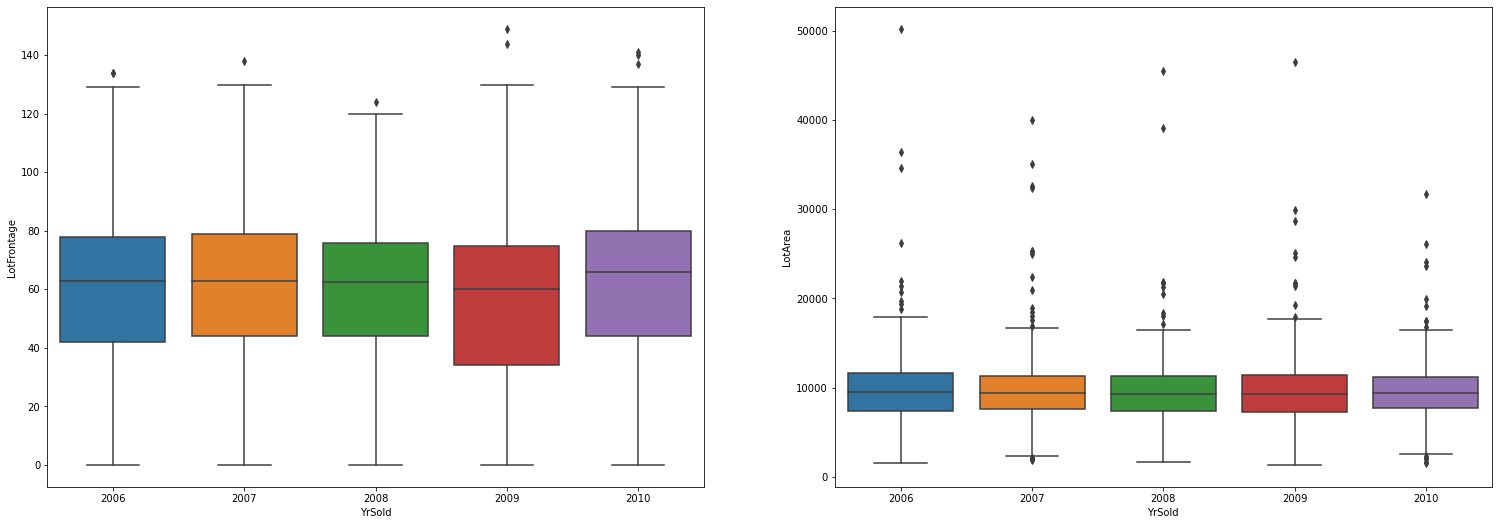

In [116]:
## Lets use subplots to check outliers again
matplt.figure(figsize=(40,30))
matplt.subplot(3,3,1)
sbn.boxplot(x='YrSold', y='LotFrontage', data=housing_df)
matplt.subplot(3,3,2)
sbn.boxplot(x='YrSold', y='LotArea', data=housing_df)
matplt.show()

In [117]:
housing_df[['LotArea']].describe(percentiles=(.25,.5,.75,.99,.995,.998,.9985,.9988, .999, .9991, .9995, .9998))



,LotArea
count,1421.000000
mean,9759.430683
std,4565.536574
min,1300.000000
25%,7500.000000
50%,9360.000000
75%,11361.000000
99%,25981.400000
99.5%,34451.800000
99.8%,40974.960000


In [118]:
## Looks like there are some outliers in the data for SalePrice
housing_df[housing_df.LotArea > housing_df.LotArea.quantile(.995)].iloc[:, :12]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF
53,68.0,50271,1981,1987,0.0,1810,0,32,1842,1842,0,0
271,73.0,39104,1954,2005,0.0,226,1063,96,1385,1363,0,0
411,100.0,34650,1955,1955,0.0,1056,0,0,1056,1056,0,0
523,130.0,40094,2007,2008,762.0,2260,0,878,3138,3138,1538,0
661,52.0,46589,1994,2005,528.0,1361,180,88,1629,1686,762,0
848,75.0,45600,1908,1997,0.0,0,0,907,907,1307,1051,0
1184,50.0,35133,1963,1963,226.0,1159,0,413,1572,1572,0,0
1287,0.0,36500,1964,1964,621.0,812,0,812,1624,1582,0,0


In [119]:
# Remove data above 99.5th percentile
housing_df = housing_df[housing_df.LotArea <= housing_df.LotArea.quantile(.995)]

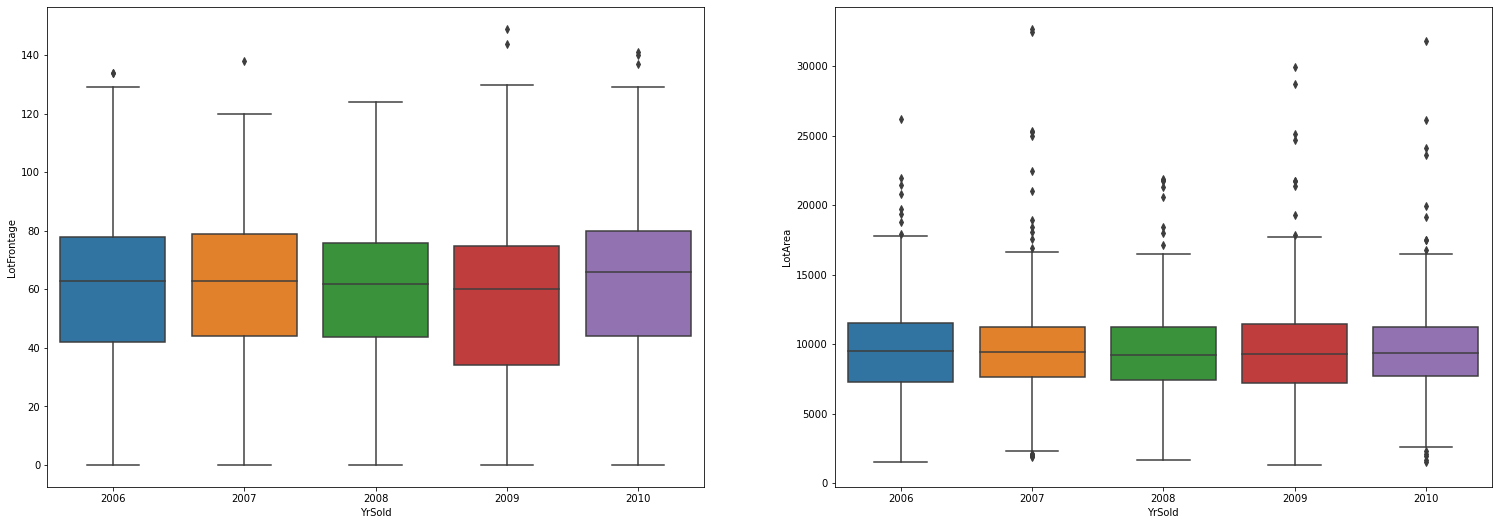

In [120]:
## Lets use subplots to check outliers again
matplt.figure(figsize=(40,30))
matplt.subplot(3,3,1)
sbn.boxplot(x='YrSold', y='LotFrontage', data=housing_df)
matplt.subplot(3,3,2)
sbn.boxplot(x='YrSold', y='LotArea', data=housing_df)
matplt.show()

### Split the data for Train and Test

In [121]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
housing_train, housing_test = train_test_split(housing_df, train_size = 0.7, test_size=0.3, random_state=100)

In [122]:
continuous_columns = housing_numeric_df.columns

In [123]:
## Lets scale the numeric values.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
housing_train[continuous_columns] = scaler.fit_transform(housing_train[continuous_columns])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [124]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 51 to 822
Columns: 299 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(33), uint8(266)
memory usage: 519.6 KB


In [125]:
### Create X and y sets
y_train = housing_train.pop('SalePrice')
X_train = housing_train



### Recursive Feature Elimination (RFE)

In [126]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [127]:
# Running RFE with the output number of the variable equal to 70
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 70)             # running RFE
rfe = rfe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=70 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [128]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 171),
 ('LotArea', False, 3),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 125),
 ('MasVnrArea', False, 74),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 23),
 ('BsmtHalfBath', False, 169),
 ('FullBath', False, 117),
 ('HalfBath', False, 118),
 ('BedroomAbvGr', False, 140),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 85),
 ('Fireplaces', False, 48),
 ('GarageYrBlt', False, 138),
 ('GarageCars', True, 1),
 ('GarageArea', False, 116),
 ('WoodDeckSF', False, 36),
 ('OpenPorchSF', False, 195),
 ('EnclosedPorch', False, 100),
 ('3SsnPorch', False, 19),
 ('ScreenPorch', False, 32),
 ('PoolArea', True, 1),
 ('MiscVal', False, 24),
 ('YrSold', False, 188),
 ('MSSubClass_30', False, 76),
 ('MSSubClass_40', False, 104),
 ('MSSubClass_45', False, 142),
 ('MSSubClass_50', False,

In [129]:
imp_columns = X_train.columns[rfe.support_]
imp_columns

Index(['YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr',
       'GarageCars', 'PoolArea', 'MSSubClass_90', 'MSSubClass_190',
       'Utilities_NoSeWa', 'Condition2_PosA', 'Condition2_RRAe',
       'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'Exterior1st_AsphShn',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'BsmtQual_NoBasement',
       'BsmtCond_NoBasement', 'BsmtCond_Po', 'BsmtFinType1_NoBasement',
       'Bs

In [130]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=228)

In [131]:
imp_columns = imp_columns.insert(len(imp_columns), 'SalePrice')

In [132]:
imp_columns

Index(['YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr',
       'GarageCars', 'PoolArea', 'MSSubClass_90', 'MSSubClass_190',
       'Utilities_NoSeWa', 'Condition2_PosA', 'Condition2_RRAe',
       'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'Exterior1st_AsphShn',
       'Exterior1st_CBlock', 'Exterior2nd_CBlock', 'BsmtQual_NoBasement',
       'BsmtCond_NoBasement', 'BsmtCond_Po', 'BsmtFinType1_NoBasement',
       'Bs

In [133]:
# We will work with the 70 columns selected using RFE
model_df = housing_df[imp_columns]

In [134]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   YearBuilt                1413 non-null   int64
 1   BsmtFinSF1               1413 non-null   int64
 2   BsmtFinSF2               1413 non-null   int64
 3   BsmtUnfSF                1413 non-null   int64
 4   TotalBsmtSF              1413 non-null   int64
 5   1stFlrSF                 1413 non-null   int64
 6   2ndFlrSF                 1413 non-null   int64
 7   LowQualFinSF             1413 non-null   int64
 8   GrLivArea                1413 non-null   int64
 9   KitchenAbvGr             1413 non-null   int64
 10  GarageCars               1413 non-null   int64
 11  PoolArea                 1413 non-null   int64
 12  MSSubClass_90            1413 non-null   uint8
 13  MSSubClass_190           1413 non-null   uint8
 14  Utilities_NoSeWa         1413 non-null   uint8
 15  Cond

In [135]:
## We will use model_df for the further development

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


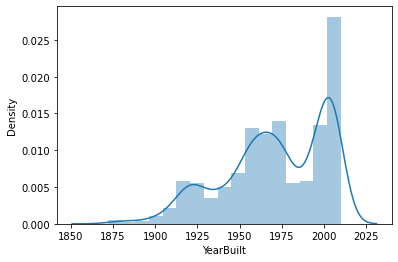

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


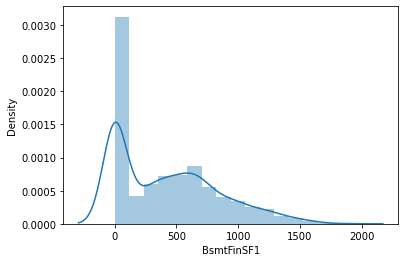

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


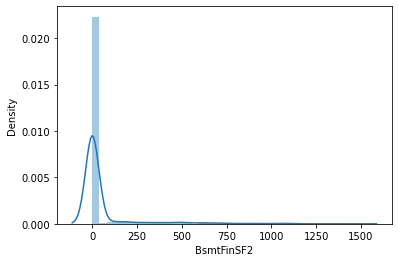

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


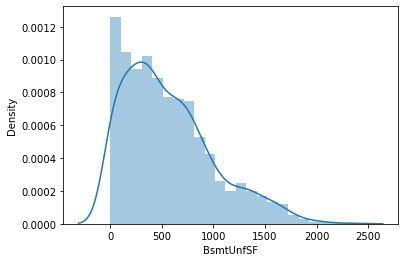

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


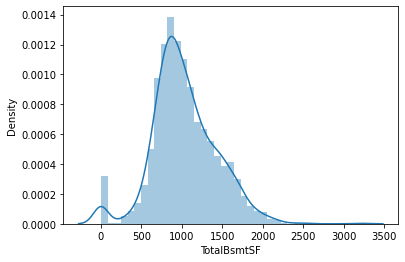

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


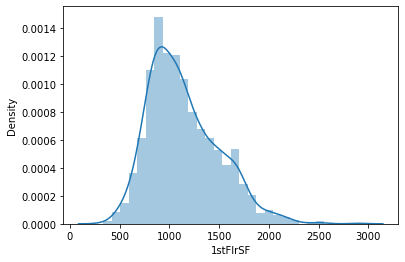

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


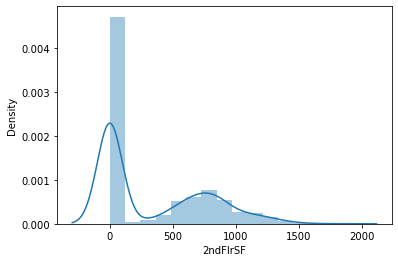

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


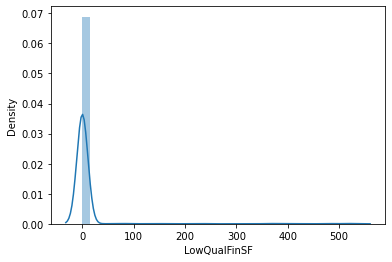

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


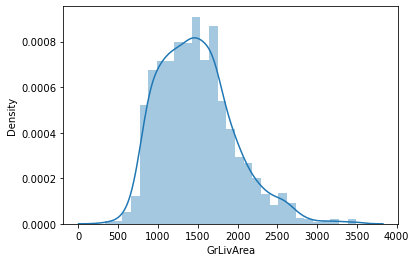

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


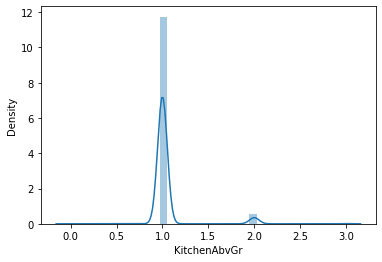

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


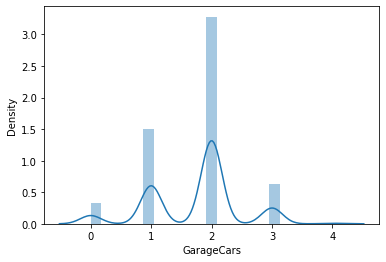

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


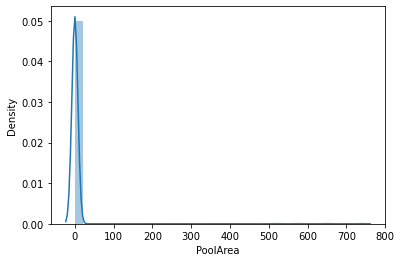

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


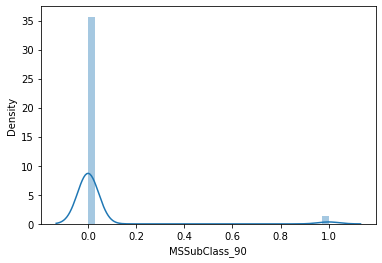

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


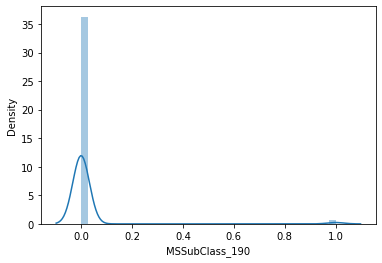

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


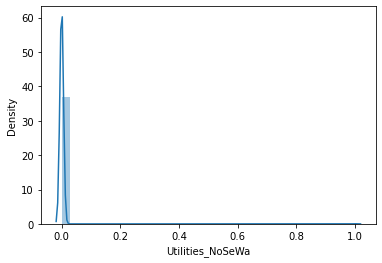

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


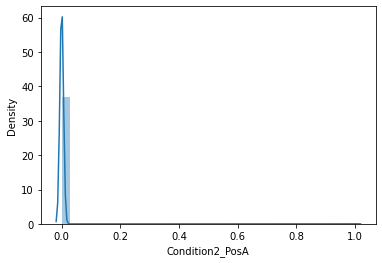

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


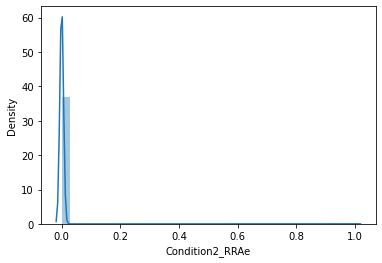

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


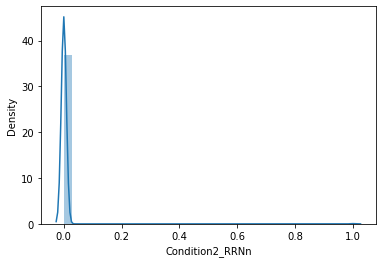

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


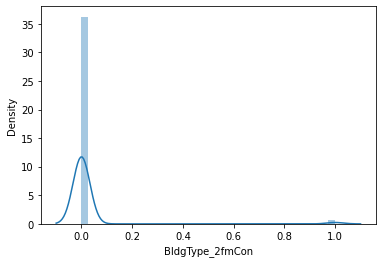

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


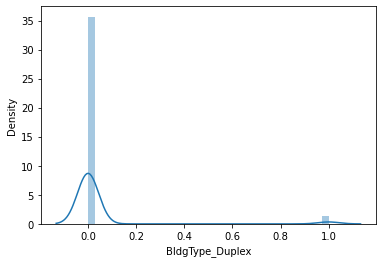

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


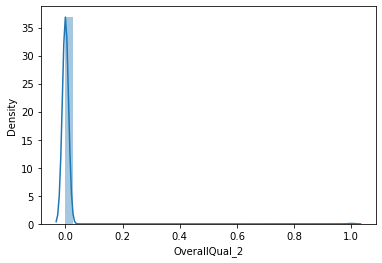

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


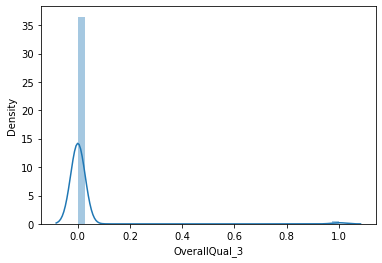

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


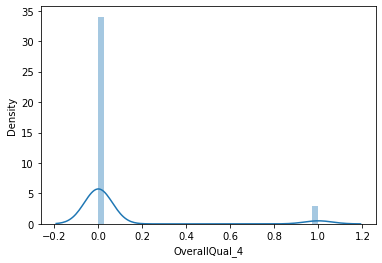

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


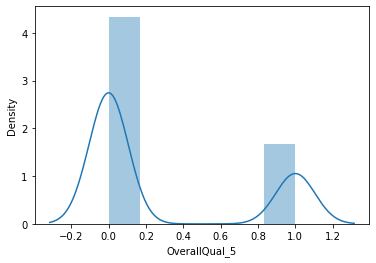

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


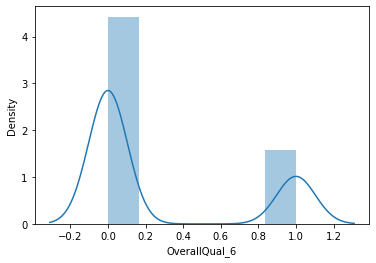

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


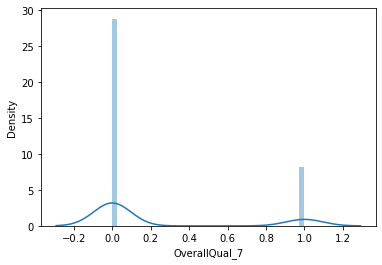

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


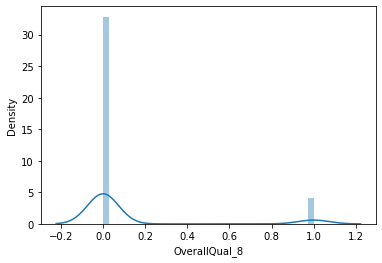

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


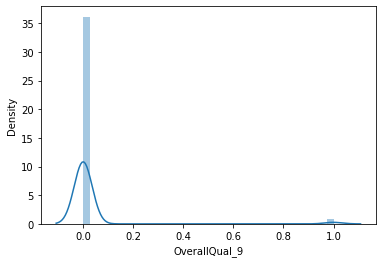

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


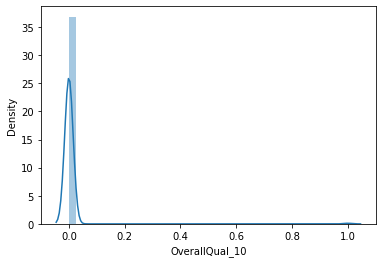

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


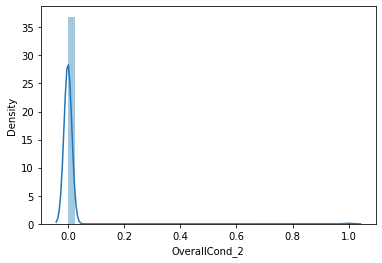

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


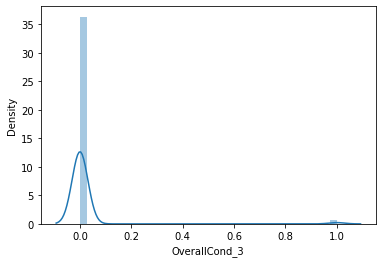

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


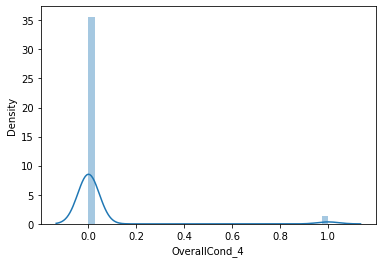

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


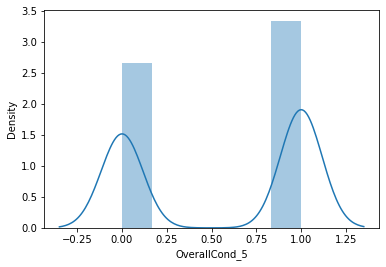

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


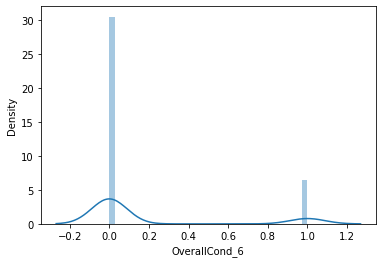

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


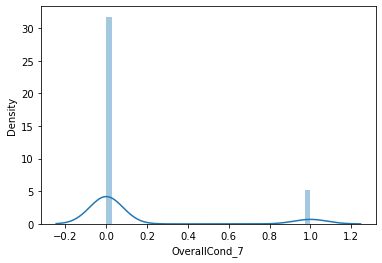

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


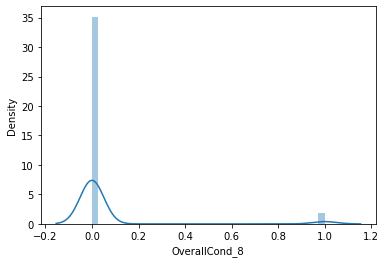

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


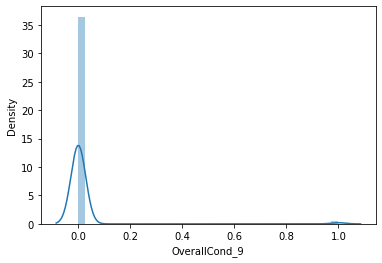

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


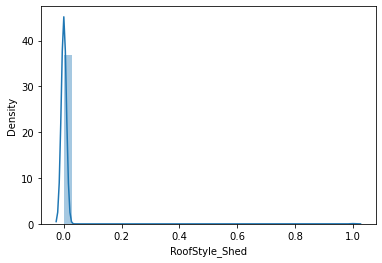

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


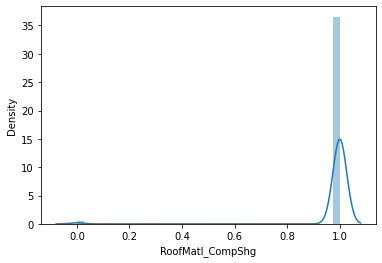

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


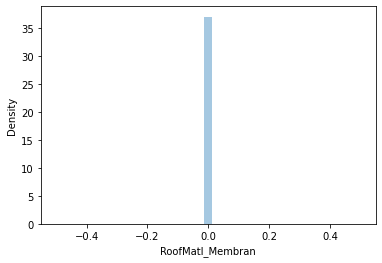

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


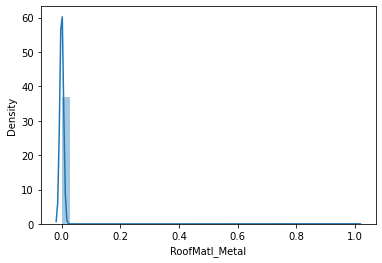

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


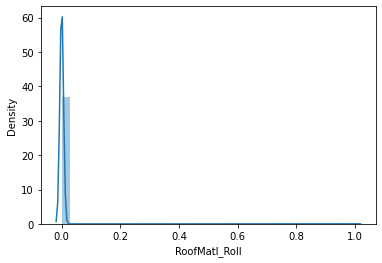

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


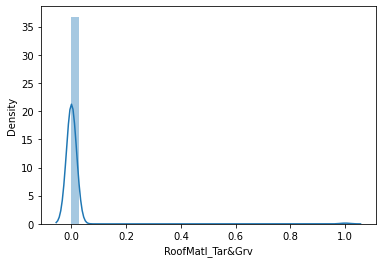

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


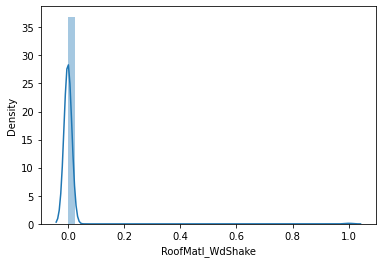

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


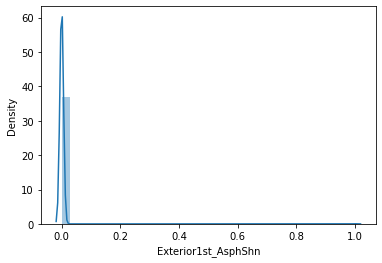

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


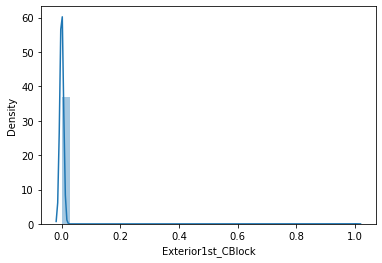

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


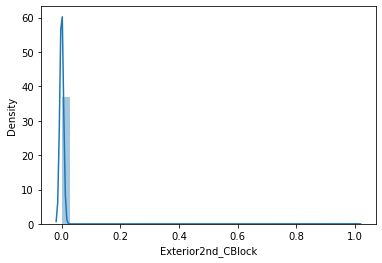

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


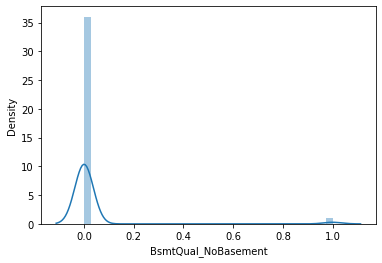

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


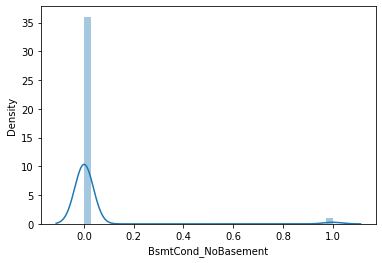

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


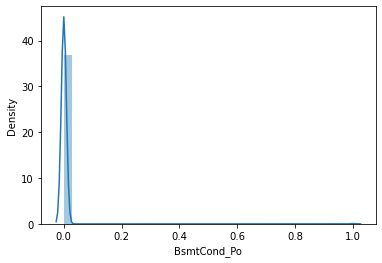

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


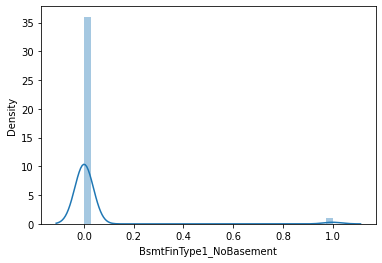

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


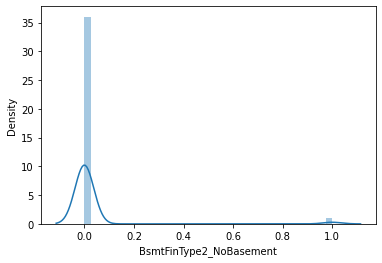

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


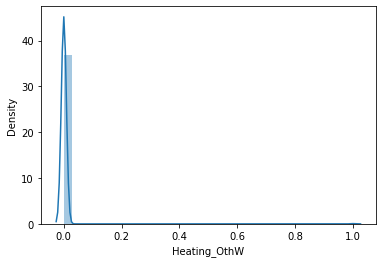

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


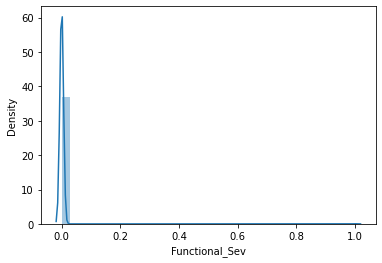

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


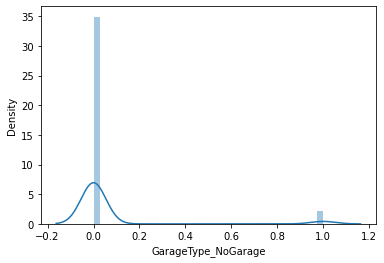

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


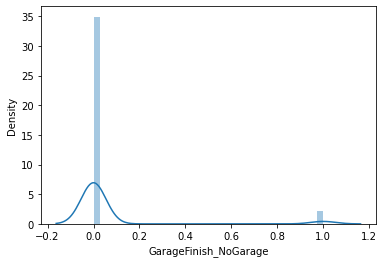

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


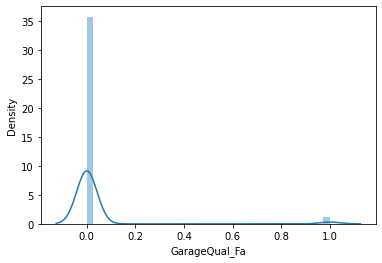

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


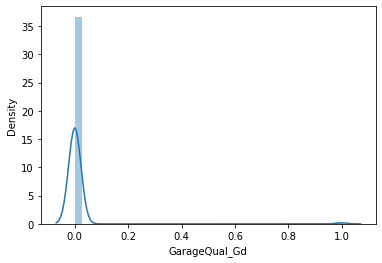

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


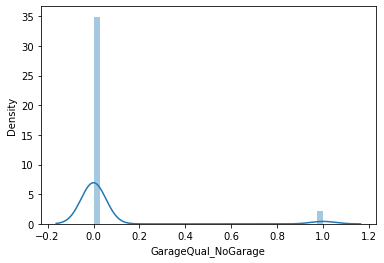

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


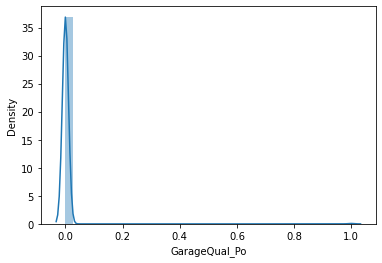

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


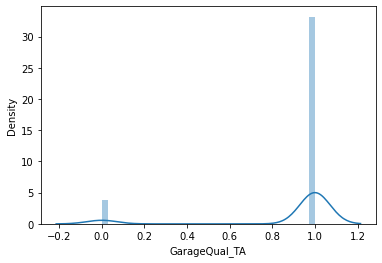

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


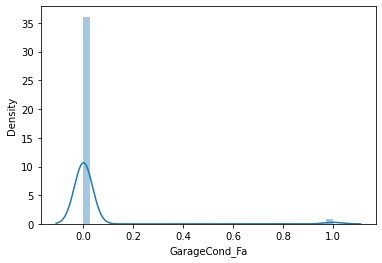

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


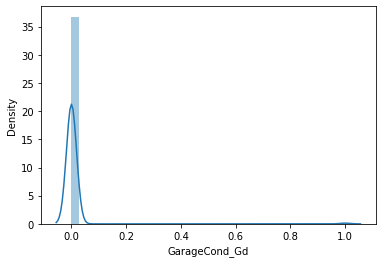

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


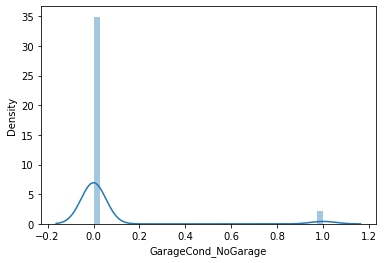

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


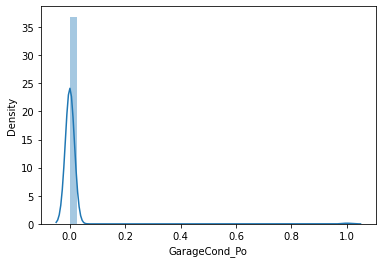

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


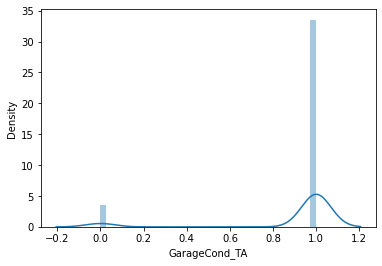

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


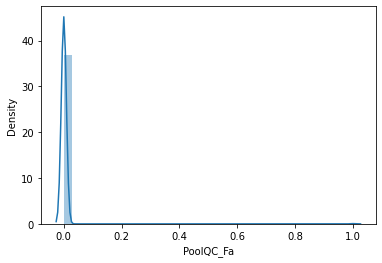

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


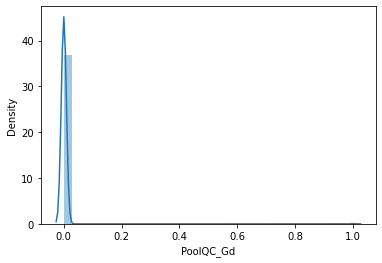

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


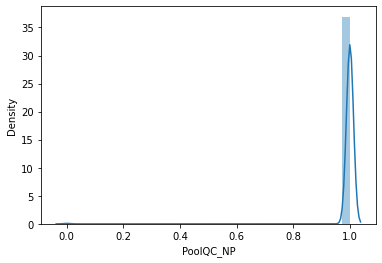

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


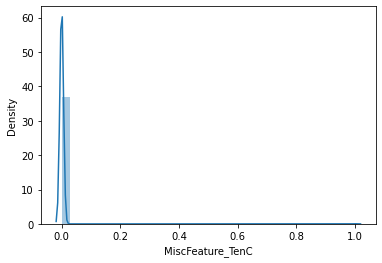

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


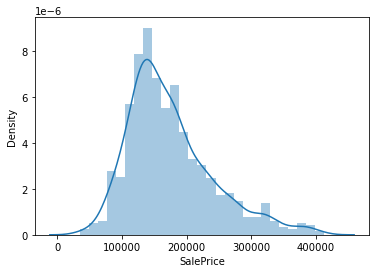

In [136]:
for column in model_df.columns:
    sbn.distplot(model_df[column])
    matplt.show()

In [137]:
model_df.corr()[['SalePrice']].iloc[:40,:]

,SalePrice
YearBuilt,0.569519
BsmtFinSF1,0.353963
BsmtFinSF2,-0.018253
BsmtUnfSF,0.223781
TotalBsmtSF,0.615268
1stFlrSF,0.590794
2ndFlrSF,0.294116
LowQualFinSF,-0.066373
GrLivArea,0.697653
KitchenAbvGr,-0.144936


In [138]:
model_df.corr()[['SalePrice']].iloc[40:,:]

,SalePrice
RoofMatl_Metal,0.002211
RoofMatl_Roll,-0.015070
RoofMatl_Tar&Grv,-0.003897
RoofMatl_WdShake,0.060206
Exterior1st_AsphShn,-0.029939
Exterior1st_CBlock,-0.027930
Exterior2nd_CBlock,-0.027930
BsmtQual_NoBasement,-0.170481
BsmtCond_NoBasement,-0.170481
BsmtCond_Po,-0.062823


In [139]:
housing_df[['RoofMatl_Membran']].describe()

,RoofMatl_Membran
count,1413.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [140]:
housing_df['RoofMatl_Membran'].unique()

array([0], dtype=uint8)

In [141]:
## There is no distinct values for RoofMatl_Membran. So drop it
del housing_df['RoofMatl_Membran']

In [142]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1459
Columns: 298 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(31), uint8(265)
memory usage: 773.3 KB


In [143]:
del model_df['RoofMatl_Membran']

In [144]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   YearBuilt                1413 non-null   int64
 1   BsmtFinSF1               1413 non-null   int64
 2   BsmtFinSF2               1413 non-null   int64
 3   BsmtUnfSF                1413 non-null   int64
 4   TotalBsmtSF              1413 non-null   int64
 5   1stFlrSF                 1413 non-null   int64
 6   2ndFlrSF                 1413 non-null   int64
 7   LowQualFinSF             1413 non-null   int64
 8   GrLivArea                1413 non-null   int64
 9   KitchenAbvGr             1413 non-null   int64
 10  GarageCars               1413 non-null   int64
 11  PoolArea                 1413 non-null   int64
 12  MSSubClass_90            1413 non-null   uint8
 13  MSSubClass_190           1413 non-null   uint8
 14  Utilities_NoSeWa         1413 non-null   uint8
 15  Cond

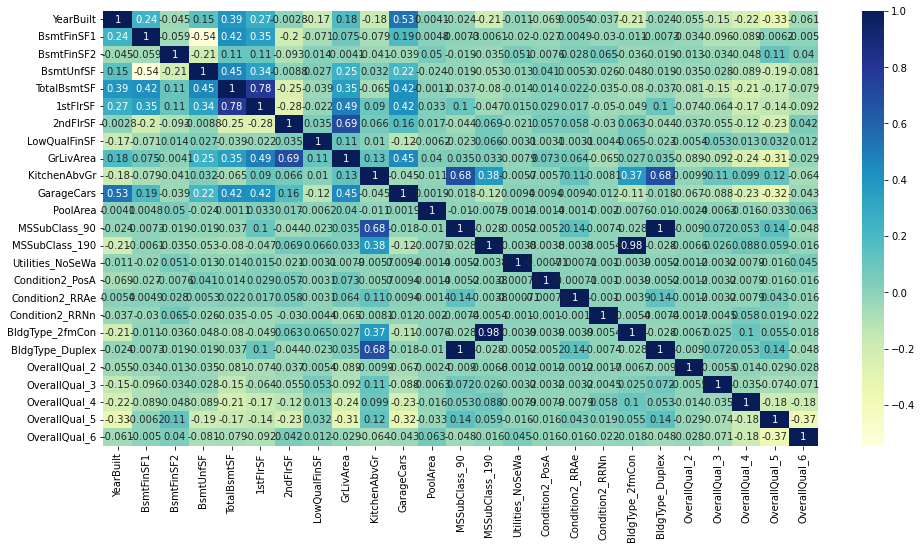

In [145]:
# Heatmap plot for correlations

# figure size
matplt.figure(figsize=(16,8))

# heatmap
sbn.heatmap(model_df.iloc[:,0:25].corr(), cmap="YlGnBu", annot=True)
matplt.show()



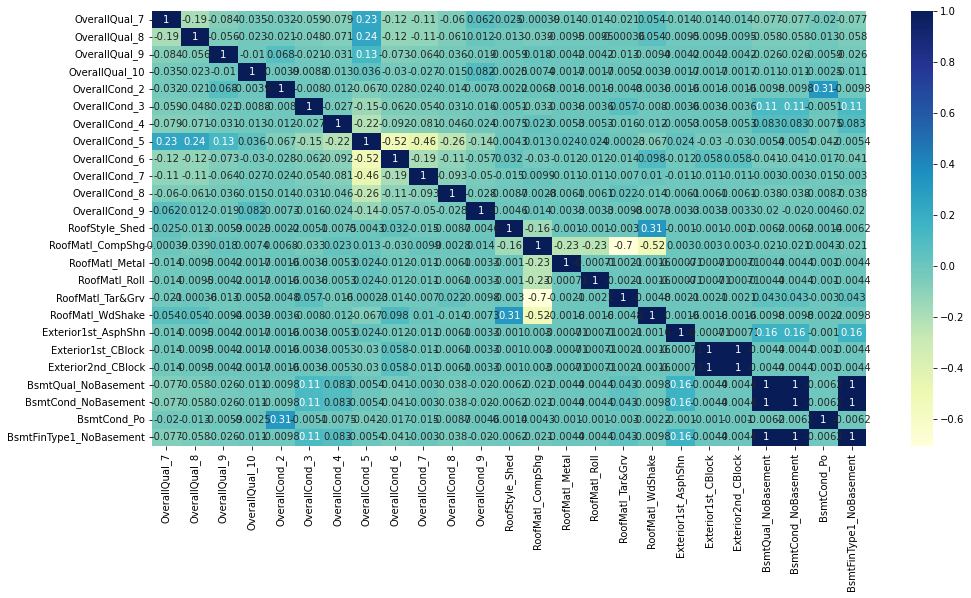

In [146]:
# Heatmap plot for correlations

# figure size
matplt.figure(figsize=(16,8))

# heatmap
sbn.heatmap(model_df.iloc[:,25:50].corr(), cmap="YlGnBu", annot=True)
matplt.show()

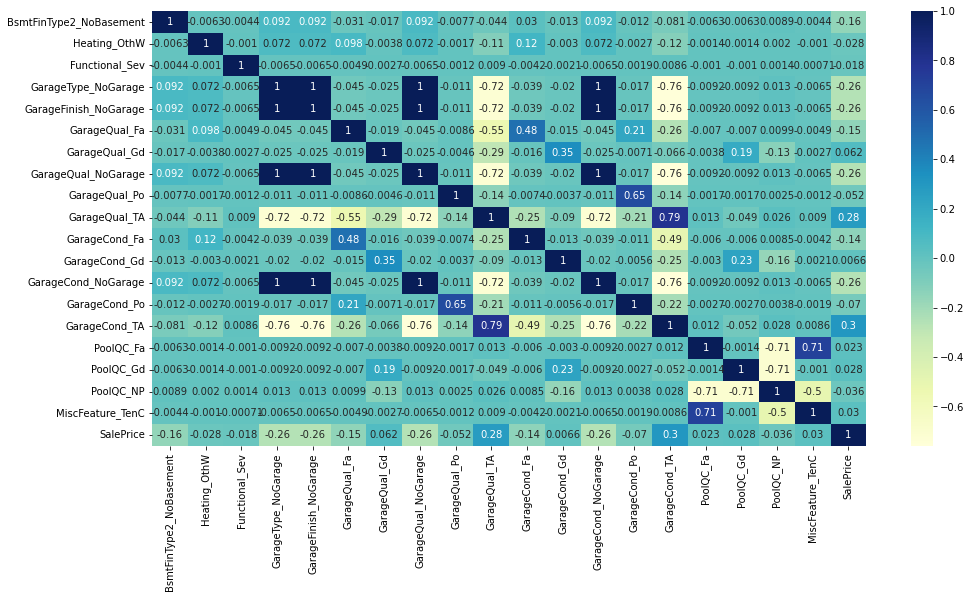

In [147]:
# Heatmap plot for correlations

# figure size
matplt.figure(figsize=(16,8))

# heatmap
sbn.heatmap(model_df.iloc[:,50:].corr(), cmap="YlGnBu", annot=True)
matplt.show()

In [148]:
## There is a good presense of multicolleanarity in the data set

In [149]:
corr = model_df.corr()[['SalePrice']]

In [150]:
corr[corr['SalePrice'] >= .3]

,SalePrice
YearBuilt,0.569519
BsmtFinSF1,0.353963
TotalBsmtSF,0.615268
1stFlrSF,0.590794
GrLivArea,0.697653
GarageCars,0.650406
OverallQual_8,0.505621
OverallQual_9,0.379982
OverallCond_5,0.336273
GarageCond_TA,0.302032


In [151]:
corr[corr['SalePrice'] <= -0.3]

,SalePrice
OverallQual_5,-0.389203


### Significant features impacting the sale price are
- YearBuilt
- BsmtFinSF1
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- GarageCars
- OverallQual_8
- OverallQual_9
- OverallCond_5
- GarageCond_TA
- OverallQual_5

In [155]:
predictors = list(imp_columns)
predictors.remove('SalePrice')
predictors.remove("RoofMatl_Membran")

In [157]:
## Split X and y
X = model_df[predictors]
y = model_df['SalePrice']

### Scaling

In [160]:
## Lets scale the features.
# Scaling the features is necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

features = X.columns
X = pd.DataFrame(scale(X))
X.columns = features
X.columns

Index(['YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr',
       'GarageCars', 'PoolArea', 'MSSubClass_90', 'MSSubClass_190',
       'Utilities_NoSeWa', 'Condition2_PosA', 'Condition2_RRAe',
       'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallCond_2', 'OverallCond_3', 'OverallCond_4',
       'OverallCond_5', 'OverallCond_6', 'OverallCond_7', 'OverallCond_8',
       'OverallCond_9', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'BsmtQual_NoBasement', 'BsmtCond_NoBasement', 'BsmtCond_Po',
       'BsmtFinType1_NoBasement', 'BsmtFinType2_NoBasement', 'He

### Train Test Split

In [161]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model Building and Evaluation

#### Linear Regression

In [162]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [163]:
from sklearn.metrics import r2_score, mean_squared_error

In [164]:
print(lm.intercept_)
print(lm.coef_)

1.5253740949878468e+16
[ 1.36715684e+04 -2.97317000e+16 -1.14403839e+16 -3.13877614e+16
  2.81813207e+16 -3.30261879e+17 -3.97781999e+17 -4.30431424e+16
  4.43277899e+17 -5.73600000e+03  8.06400000e+03  2.07488789e+17
  8.41969056e+16 -4.39345129e+17  1.08681881e+17  1.44642015e+17
 -3.86278016e+17  1.34294489e+17  4.46960308e+17 -8.41969056e+16
 -2.41629826e+16 -6.20113110e+16 -1.42967512e+17 -2.35037014e+17
 -2.30994251e+17 -2.17746565e+17 -1.65892857e+17 -8.04455358e+16
 -3.41352455e+16 -5.13060560e+15 -1.13906115e+16 -1.65649035e+16
 -4.29197154e+16 -3.29198968e+16 -3.01181089e+16 -1.88750336e+16
 -1.04546998e+16  2.71600000e+03 -2.58435284e+17  8.57246873e+16
  1.64394617e+17 -1.83329883e+17 -1.36840541e+17 -3.37502545e+16
 -2.39907435e+17  2.39907435e+17  2.52515796e+17 -3.73859453e+17
 -2.29843225e+16  1.21343656e+17 -8.51200000e+03 -1.80300000e+03
 -1.81600000e+03  1.07399490e+17 -5.18459270e+15 -2.66911087e+16
 -1.47422988e+16 -3.04612586e+16 -6.85113490e+15 -4.53061408e+16
  

In [165]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [175]:
## Lets collect the evaluation parameters of Linear Regression into a metric for comparison
eval_metric_lr = []

r2_train = r2_score(y_train, y_pred_train)
print("R2 score for Train data:", r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("R2 score for Test data:", r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
rss_test = np.sum(np.square(y_test - y_pred_test))

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train**0.5

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5

eval_metric_lr.append(r2_train)
eval_metric_lr.append(r2_test)
eval_metric_lr.append(rss_train)
eval_metric_lr.append(rss_test)
eval_metric_lr.append(rmse_train)
eval_metric_lr.append(rmse_test)


R2 score for Train data: 0.8990690331618199
R2 score for Test data: -2.470425781679656e+26


In [167]:
## Here there is a clear indication of over fitting
## It performs badly on the test data

#### R2 score shows that there is clearly overfitting
##### Performs well with train data, but poorly on the test data

#### Lets apply the regularization techniques - Ridge and Lasso 

In [168]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [169]:
from sklearn.model_selection import GridSearchCV

### Ridge regression

In [170]:
# Lets consider the below alpha values for ridge 
alpha_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# We will run the model for each of these alpha values and evaluate
ridge = Ridge()

# Lets set 6 folds for the cross validation
folds = 6
model_gs_cv = GridSearchCV(estimator=ridge, param_grid=alpha_params,
                          scoring='neg_mean_absolute_error', cv = folds,
                          return_train_score=True, verbose=1)
model_gs_cv.fit(X_train, y_train)

Fitting 6 folds for each of 28 candidates, totalling 168 fits


GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [171]:
# Lets see what is the best hyperparameter alpha value
print(model_gs_cv.best_params_)

{'alpha': 100}


In [172]:
# Lets apply the {"alpha": 100} and run the model
alpha = 100

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.intercept_)
print(ridge.coef_)

174510.70183608052
[ 1.18980597e+04  8.52066633e+03  1.42116037e+03 -1.85505851e+02
  9.35974241e+03  8.79221807e+03  9.83024330e+03 -1.04483508e+03
  1.52704552e+04 -4.94512402e+03  8.70501676e+03  9.70126270e+02
 -9.05020554e+02 -2.65030736e+02 -4.90090081e-28 -4.90090081e-28
 -4.90090081e-28  0.00000000e+00 -2.60515220e+02 -9.05020554e+02
 -2.81532299e+02 -2.30666114e+03 -5.20466284e+03 -7.15405093e+03
 -4.58020194e+03  2.17216903e+03  1.20291311e+04  1.21988988e+04
  6.19144736e+03 -4.82350550e+02 -3.87663491e+03 -2.61197453e+03
 -2.26289258e+03 -2.81573299e+02  3.92824254e+03  3.14381440e+03
  2.22087630e+03  2.12376843e+03  9.19727628e+02 -5.01217962e-28
 -5.01217962e-28 -7.69915277e+02 -7.05504329e+02 -5.01217962e-28
 -1.49105109e+02 -1.49105109e+02  9.51344678e+02  9.51344678e+02
 -1.40941936e+03  9.51344678e+02 -8.32969201e+02 -1.71315246e+03
 -1.69987895e+03  3.62449857e+02  3.62449857e+02 -9.51155905e+02
  9.23702656e+02  3.62449857e+02 -1.35215007e+01 -2.51985124e+02
 -2.77

In [176]:
# Lets capture the metrics
eval_metric_ridge = []

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
print("Ridge - R2 score for train data", r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("Ridge - R2 score for test data", r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
rss_train = np.sum(np.square(y_test - y_pred_test))

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train**0.5

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5

eval_metric_ridge.append(r2_train)
eval_metric_ridge.append(r2_test)
eval_metric_ridge.append(rss_train)
eval_metric_ridge.append(rss_test)
eval_metric_ridge.append(rmse_train)
eval_metric_ridge.append(rmse_test)

Ridge - R2 score for train data 0.8970539568046042
Ridge - R2 score for test data 0.8758470355721312


##### Ridge Regression Findings
- R2 Score Train : 0.897
- R2 Score Test : 0.876

This is a good model

### Lasso Regression

Lets create a Lass Regression model and see what is the difference

In [178]:
lasso = Lasso()

# Lets perform cross validation
model_ls_cv = GridSearchCV(estimator=lasso, param_grid=alpha_params,
                          scoring="neg_mean_absolute_error",
                          cv=folds, return_train_score=True,
                          verbose=1)

model_ls_cv.fit(X_train, y_train)

Fitting 6 folds for each of 28 candidates, totalling 168 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39213490917.85776, tolerance: 361150166.4924466
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20855691751.848053, tolerance: 375793176.33743393
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20372553509.994537, tolerance: 390546345.58280003
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27545300607.358215, tolerance: 375793176.33743393
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14401726291.933472, tolerance: 390546345.58280003
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13242717919.973633, tolerance: 376666890.7615339
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceW

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13290849050.618347, tolerance: 376666890.7615339
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3666999170.2194824, tolerance: 382760514.59069276
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9089906240.783875, tolerance: 380703203.77396804
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 933712650.8544312, tolerance: 376666890.7615339
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 751512961.0993042, tolerance: 382760514.59069276
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 871984542.6520996, tolerance: 380703203.77396804
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1200872422.1409302, tolerance: 361150166.4924466
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1053677597.0999756, tolerance: 375793176.33743393
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1624346540.2810059, tolerance: 390546345.58280003
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceW

GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [179]:
## Lets check the best value of the alpha param
print(model_ls_cv.best_params_)

{'alpha': 500}


In [180]:
## Lets use the best alpha {'alpha': 500} for Lasso Regression
alpha = 500
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [181]:
print(lasso.intercept_)
print(lasso.coef_)

174414.5261560491
[ 1.36294696e+04  8.81476258e+03  1.06883676e+03 -0.00000000e+00
  8.60411898e+03  5.33608803e+02  0.00000000e+00 -1.84199133e+03
  2.77089383e+04 -5.87617738e+03  7.34025834e+03  0.00000000e+00
 -2.40223732e+02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -8.21428662e+01
  0.00000000e+00 -5.75408711e+02 -1.97819041e+03 -2.06738928e+03
 -0.00000000e+00  6.13702609e+03  1.58732337e+04  1.43577788e+04
  7.06214801e+03 -4.92245299e+01 -3.45921327e+03 -2.05070196e+03
 -2.08876759e+03  0.00000000e+00  4.38920394e+03  3.43747457e+03
  2.30361278e+03  1.51870952e+03  1.38681483e+03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.47270136e+01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.07775369e+03  0.00000000e+00
 -2.42928283e+02  3.26913665e+00  0.00000000e+00 -1.48829592e+03
 -1.59279055e+03  2.90686965e+01  9.11075902e-13 -6.36146629e+01
  4.54106934e+02  1.56767497e-01  0.00000000e+00 -0.00000000e+00
 -0.000

In [182]:
# Lets capture the metrics
eval_metric_lasso = []

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
print("Lasso - R2 score for train data", r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("Lasso - R2 score for test data", r2_test)

rss_train = np.sum(np.square(y_train - y_pred_train))
rss_train = np.sum(np.square(y_test - y_pred_test))

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train**0.5

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test**0.5

eval_metric_lasso.append(r2_train)
eval_metric_lasso.append(r2_test)
eval_metric_lasso.append(rss_train)
eval_metric_lasso.append(rss_test)
eval_metric_lasso.append(rmse_train)
eval_metric_lasso.append(rmse_test)

Lasso - R2 score for train data 0.8965363482848627
Lasso - R2 score for test data 0.8755190512974956


##### Lasso Regression Findings
- R2 Score Train : 0.897
- R2 Score Test : 0.876

This is a good model

In [183]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': eval_metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(eval_metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(eval_metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.990690e-01,8.970540e-01,8.965363e-01
1,R2 Score (Test),-2.470426e+26,8.758470e-01,8.755191e-01
2,RSS (Train),4.579696e+11,2.056485e+11,2.061918e+11
3,RSS (Test),4.092044e+38,4.092044e+38,4.092044e+38
4,RMSE (Train),2.151891e+04,2.173266e+04,2.178722e+04
5,RMSE (Test),9.823974e+17,2.202317e+04,2.205224e+04


#### Comparing Models
- Linear Regression shows clear case of overfitting
- Ridge and Lasso models are giving almost same stats
- However Ridge is slightly better in terms of R2 score, RMSE
- We will go with Lasso Regression because of the automatic feature elimination
- We would be able to identify major features impacting
- And wit Lasso, we will be able to explain the results better

### Lets check which all features are significant from the Lasso
- We will check the coefficients for this

In [184]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear Regression'] = lm.coef_
betas['Ridge Regression'] = ridge.coef_
betas['Lasso Regression'] = lasso.coef_

/var/folders/zv/4f_6jzdn08124jg7xpkc2fk80000gn/T/ipykernel_9335/3606453459.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X.columns


In [186]:
pd.set_option('display.max_rows', None)
betas.head(70)

,Linear Regression,Ridge Regression,Lasso Regression
YearBuilt,1.367157e+04,1.189806e+04,1.362947e+04
BsmtFinSF1,-2.973170e+16,8.520666e+03,8.814763e+03
BsmtFinSF2,-1.144038e+16,1.421160e+03,1.068837e+03
BsmtUnfSF,-3.138776e+16,-1.855059e+02,-0.000000e+00
TotalBsmtSF,2.818132e+16,9.359742e+03,8.604119e+03
1stFlrSF,-3.302619e+17,8.792218e+03,5.336088e+02
2ndFlrSF,-3.977820e+17,9.830243e+03,0.000000e+00
LowQualFinSF,-4.304314e+16,-1.044835e+03,-1.841991e+03
GrLivArea,4.432779e+17,1.527046e+04,2.770894e+04
KitchenAbvGr,-5.736000e+03,-4.945124e+03,-5.876177e+03


### Based on the Lasso Regression following are the significant features impacting SalePrice
- YearBuilt :- Original construction date
- BsmtFinSF1 :- Type 1 finished square feet
- BsmtFinSF2 :- Type 2 finished square feet
- TotalBsmtSF :- Total square feet of basement area
- 1stFlrSF :- First Floor square feet
- LowQualFinSF :- Low quality finished square feet (all floors)
- GrLivArea :- Above grade (ground) living area square feet
- KitchenAbvGr :- Kitchens above grade
- GarageCars :- Size of garage in car capacity
- MSSubClass_90 :- Identifies the type of dwelling involved in the sale (DUPLEX - ALL STYLES AND AGES)
- BldgType_Duplex :- Type of dwelling (Duplex)
- OverallQual_3 :- The overall material and finish of the house (Fair)
- OverallQual_4 :- The overall material and finish of the house (Below Average)
- OverallQual_5 :- The overall material and finish of the house (Average)
- OverallQual_7 :- The overall material and finish of the house (Good)
- OverallQual_8 :- The overall material and finish of the house (Very Good)
- OverallQual_9 :- The overall material and finish of the house (Excellent)
- OverallQual_10 :- The overall material and finish of the house (Very Excellent)
- OverallCond_2 :- The overall condition of the house (Poor)
- OverallCond_3 :- The overall condition of the house (Fair)
- OverallCond_4 :- The overall condition of the house (Below Average)
- OverallCond_5 :- The overall condition of the house (Average)
- OverallCond_7 :- The overall condition of the house (Good)
- OverallCond_8 :- The overall condition of the house (Very Good)
- OverallCond_9 :- The overall condition of the house (Excellent)
- RoofStyle_Shed :- Type of roof (Shed)
- RoofMatl_CompShg :- Roof material (Standard (Composite) Shingle)
- RoofMatl_WdShake :- Roof material (Wood Shakes)
- BsmtQual_NoBasement :- The height of the basement (No Basement)
- BsmtCond_Po :- Evaluates the general condition of the basement (Poor - Severe cracking, settling, or wetness)
- BsmtFinType1_NoBasement :- Rating of basement finished area (No Basement)
- Heating_OthW :- Type of heating (Hot water or steam heat other than gas)
- Functional_Sev :- Home functionality (Assume typical unless deductions are warranted) (Severely Damaged)
- GarageType_NoGarage :- GarageType (No Garage)
- GarageQual_Fa :- Garage quality (Fair)
- GarageQual_Gd :- Garage quality (Good)
- GarageQual_NoGarage :- Garage quality (No Garage)
- GarageCond_NoGarage :- Garage condition (No Garage)
- GarageCond_Po :- Garage condition (Poor)
- PoolQC_Gd :- Pool quality (Good)
- MiscFeature_TenC :- Miscellaneous (Tennis Court)